<a href="https://colab.research.google.com/github/Randall19/Hello-World/blob/master/Copy_of_imagescrapper_wild_plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install jmd-imagescraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -Uqq fastbook

In [ ]:
import fastbook
from fastbook import *
fastbook.setup_book()
from fastai.vision.widgets import *



In [ ]:
from jmd_imagescraper.core import *
from pathlib import Path
from jmd_imagescraper.imagecleaner import *

In [ ]:
wild_plant=['mushroom','lichen']
path=Path().cwd()/"wild_plant"

In [ ]:
duckduckgo_search(path, "lichen", "lichens", max_results=100)

Duckduckgo search: lichens


[Path('/content/wild_plant/lichen/101_c992dfa2.jpg'),
 Path('/content/wild_plant/lichen/102_b7d55944.jpg'),
 Path('/content/wild_plant/lichen/103_609a258f.jpg'),
 Path('/content/wild_plant/lichen/104_d26e62ee.jpg'),
 Path('/content/wild_plant/lichen/105_ecfa8d0c.jpg'),
 Path('/content/wild_plant/lichen/106_efe1816c.jpg'),
 Path('/content/wild_plant/lichen/107_91b3e0d0.jpg'),
 Path('/content/wild_plant/lichen/108_502f1750.jpg'),
 Path('/content/wild_plant/lichen/109_48c99598.jpg'),
 Path('/content/wild_plant/lichen/110_d4966c8f.jpg'),
 Path('/content/wild_plant/lichen/111_34f884c6.jpg'),
 Path('/content/wild_plant/lichen/112_b623458b.jpg'),
 Path('/content/wild_plant/lichen/113_f31ce112.jpg'),
 Path('/content/wild_plant/lichen/114_6197e808.jpg'),
 Path('/content/wild_plant/lichen/115_8fe4ffbc.jpg'),
 Path('/content/wild_plant/lichen/116_b2d3504a.jpg'),
 Path('/content/wild_plant/lichen/117_5af422bd.jpg'),
 Path('/content/wild_plant/lichen/118_293dae2d.jpg'),
 Path('/content/wild_plant/l

In [ ]:
duckduckgo_search(path, "mushroom","mushrooms", max_results=100)

Duckduckgo search: mushrooms


[Path('/content/wild_plant/mushroom/101_51b127cc.jpg'),
 Path('/content/wild_plant/mushroom/102_a4414286.jpg'),
 Path('/content/wild_plant/mushroom/103_896ff539.jpg'),
 Path('/content/wild_plant/mushroom/104_a3991042.jpg'),
 Path('/content/wild_plant/mushroom/105_e9755ce8.jpg'),
 Path('/content/wild_plant/mushroom/106_d9fb0f5f.jpg'),
 Path('/content/wild_plant/mushroom/107_d79025e2.jpg'),
 Path('/content/wild_plant/mushroom/108_c8440ccb.jpg'),
 Path('/content/wild_plant/mushroom/109_f0d6eff4.jpg'),
 Path('/content/wild_plant/mushroom/110_c879219c.jpg'),
 Path('/content/wild_plant/mushroom/111_0c5526d8.jpg'),
 Path('/content/wild_plant/mushroom/112_ee695834.jpg'),
 Path('/content/wild_plant/mushroom/113_dcf0e321.jpg'),
 Path('/content/wild_plant/mushroom/114_b38ae43c.jpg'),
 Path('/content/wild_plant/mushroom/115_efe830d4.jpg'),
 Path('/content/wild_plant/mushroom/116_e0c2bd41.jpg'),
 Path('/content/wild_plant/mushroom/117_ca7752e9.jpg'),
 Path('/content/wild_plant/mushroom/118_2b965608

In [ ]:
path=Path().cwd()/"wild_plant"

In [ ]:
fns=get_image_files(path)
fns

(#400) [Path('/content/wild_plant/lichen/060_97024e04.jpg'),Path('/content/wild_plant/lichen/042_43404fa2.jpg'),Path('/content/wild_plant/lichen/144_8c52ed53.jpg'),Path('/content/wild_plant/lichen/086_a7a217ea.jpg'),Path('/content/wild_plant/lichen/126_1b9d0662.jpg'),Path('/content/wild_plant/lichen/162_985577ec.jpg'),Path('/content/wild_plant/lichen/200_68c9ea1a.jpg'),Path('/content/wild_plant/lichen/178_e232a2c3.jpg'),Path('/content/wild_plant/lichen/129_06f433de.jpg'),Path('/content/wild_plant/lichen/044_50aa0f03.jpg')...]

In [ ]:
#failed=verify_images(fns)
#failed

(#0) []

In [ ]:
wild_plant=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

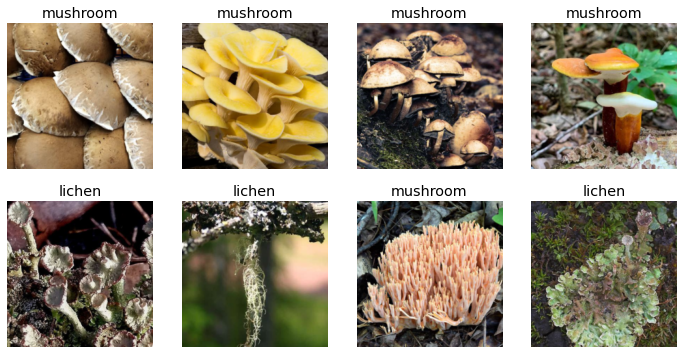

In [ ]:
dls=wild_plant.dataloaders(path)
dls.valid.show_batch(max_n=8,nrows=2)

In [ ]:
wild_plant=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

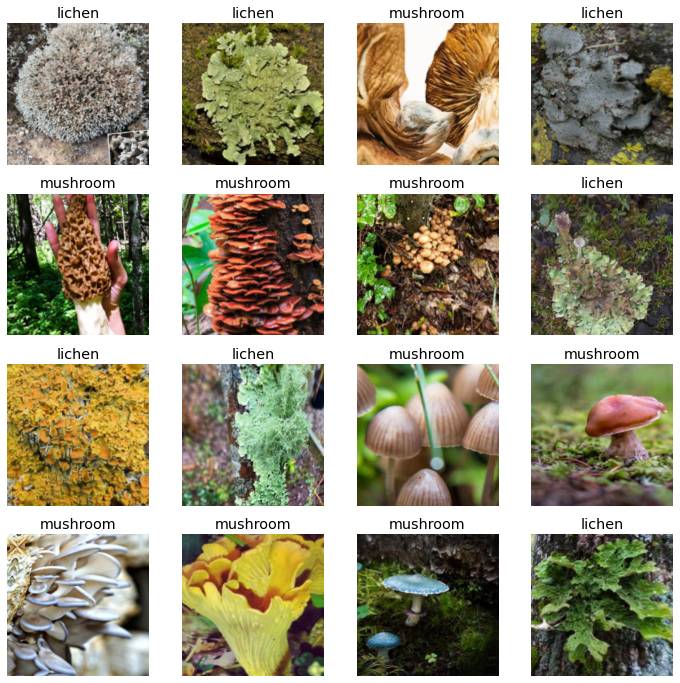

In [ ]:
dls.show_batch(max_n=16)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=error_rate,)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.649856,0.364630,0.062500,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.026057,0.115697,0.037500,00:05
1,0.018773,0.060325,0.012500,00:05
2,0.014187,0.021545,0.012500,00:06
3,0.012960,0.030620,0.025000,00:05


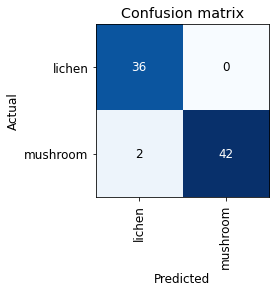

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

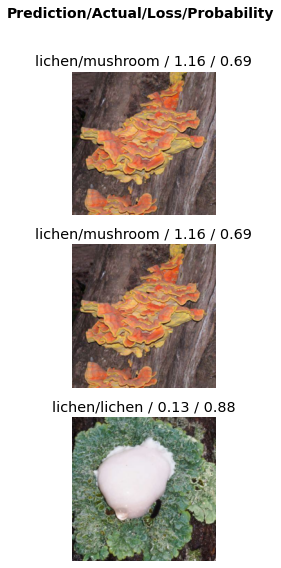

In [ ]:
interp.plot_top_losses(3,nrows=3)

In [ ]:
learn.export()
path=Path()
path.ls(file_exts='.pkl')
learn_inf=load_learner(path/'export.pkl')
btn_upload=widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img=PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl


Output()

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)
Ibl_pred = widgets.Label()
Ibl_pred.value =f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
Ibl_pred

Label(value='Prediction: mushroom; Probability: 1.0000')